# 001 Tests on how to extend the stellarflow system to a `tf-agents` compatible RL-Env.

Inspiration: https://towardsdatascience.com/creating-a-custom-environment-for-tensorflow-agent-tic-tac-toe-example-b66902f73059

In [1]:
## Imports
import numpy as np
import tensorflow as tf

## Sys-Path
import sys
if "..\\" not in sys.path: sys.path.append("..\\")

## Import custom modules
from importlib import reload  

from system import nBodySystem as nbs
nbs = reload(nbs)
nBodySystem = nbs.nBodySystem

from env import stellarEnv as ste
ste = reload(ste)
stellarEnv = ste.stellarEnv

## Settings
AU, ED = nBodySystem._AU, nBodySystem._ED

## Checking if GPU is used
if len(tf.config.list_physical_devices('GPU')) == 0:
    print("NO GPU FOUND!")

In [2]:
from tf_agents.environments import py_environment
from tf_agents.environments import tf_environment
from tf_agents.environments import tf_py_environment
from tf_agents.environments import utils
from tf_agents.specs import array_spec
from tf_agents.environments import wrappers
from tf_agents.environments import suite_gym
from tf_agents.trajectories import time_step as ts

## Testing

In [3]:
X = np.array([
    [0., 0.,    0.], # Sun 
    [1., 0.,    0.], # Earth
    [0., 1.524, 0.]  # Mars
])

V = np.array([
    [0.,           0., 0.],  # Sun 
    [0., 29290./AU*ED, 0.],  # Earth
    [27070./AU*ED, 0., 0.],  # Mars
])

M = np.array([
    1.,                # Sun
    3.0025e-6,         # Earth
    0.107 * 3.0025e-6  # Mars
])

## Trying to make the env a tf_env

In [4]:
SEM_system = nBodySystem(X, V, M)
env = stellarEnv(mass=1e-28, initial_location=[1.1, 0., 0.], initial_velocity=[0., 0.01, 0.], target_point=[2., 0., 0.], stfSystem=SEM_system)
tf_env = tf_py_environment.TFPyEnvironment(env)
print(isinstance(tf_env, tf_environment.TFEnvironment))
print("TimeStep Specs:", tf_env.time_step_spec())
print("Action Specs:", tf_env.action_spec())

True
TimeStep Specs: TimeStep(
{'discount': BoundedTensorSpec(shape=(), dtype=tf.float32, name='discount', minimum=array(0., dtype=float32), maximum=array(1., dtype=float32)),
 'observation': {'q-vector': TensorSpec(shape=(4, 6), dtype=tf.float32, name='q-vector'),
                 'target': TensorSpec(shape=(3,), dtype=tf.float32, name='target')},
 'reward': TensorSpec(shape=(), dtype=tf.float32, name='reward'),
 'step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type')})
Action Specs: BoundedTensorSpec(shape=(3,), dtype=tf.float32, name='boost', minimum=array(-1.e-31, dtype=float32), maximum=array(1.e-31, dtype=float32))


In [5]:
from tf_agents.policies import random_tf_policy

time_step_spec = tf_env.time_step_spec()
action_spec    = tf_env.action_spec()

rand_tf_policy = random_tf_policy.RandomTFPolicy(
    time_step_spec=time_step_spec,
    action_spec=action_spec
)

In [6]:
time_step = tf_env._reset()
for _ in range(300):
    action = rand_tf_policy.action(time_step).action
    time_step = tf_env._step([action])

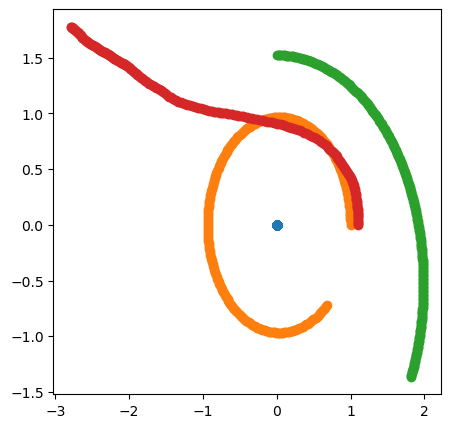

In [7]:
SEM_system.plot_history_2d()